# **Sobre o conjunto de dados** <p>
"Unicórnio" é um termo usado na indústria de capital de risco para descrever uma startup de capital fechado com valor superior a US$ 1 bilhão. O termo foi popularizado pela primeira vez pela capitalista de risco Aileen Lee, fundadora da Cowboy Ventures, um fundo de capital de risco com sede em Palo Alto, Califórnia.

Unicórnios também podem se referir a um fenômeno de recrutamento no setor de recursos humanos (RH). Os gerentes de RH podem ter grandes expectativas para preencher um cargo, levando-os a procurar candidatos com qualificações superiores às exigidas para um cargo específico. Em essência, esses gerentes estão procurando um unicórnio, o que leva a uma desconexão entre seu candidato ideal e quem eles podem contratar do grupo de pessoas disponíveis.



In [583]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [584]:
#Ler os dados
base_dados = pd.read_csv('unicorns till sep 2022.csv')
#verificar Dimensões
base_dados.shape


(1186, 7)

In [585]:
base_dados = base_dados.reset_index()
base_dados.head()

,index,Company,Valuation ($B),Date Joined,Country,City,Industry,Investors
0,0,ByteDance,$140,4/7/2017,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S..."
1,1,SpaceX,$127,12/1/2012,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen..."
2,2,SHEIN,$100,7/3/2018,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China..."
3,3,Stripe,$95,1/23/2014,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG"
4,4,Canva,$40,1/8/2018,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat..."


In [586]:
#Colunas
base_dados.columns

Index(['index', 'Company', 'Valuation ($B)', 'Date Joined', 'Country', 'City ',
       'Industry', 'Investors'],
      dtype='object')

In [603]:
#Renomear
base_dados.rename ( 
columns= {
'index' : 'ID', 
'Company' : 'Empresa',
'Valuation ($B)' : 'Valor ($)',
'Country' : 'País',
'Industry' : 'Setor',
'Date Joined' : 'Data de Adesão',
'City': 'Cidade',
'Investors' : 'Investidores'
}, inplace=True)


In [604]:
#Verificar o tipo da informação
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1186 non-null   int64         
 1   Empresa         1186 non-null   object        
 2   Valor ($)       1186 non-null   object        
 3   Data de Adesão  1186 non-null   datetime64[ns]
 4   País            1186 non-null   object        
 5   City            1186 non-null   object        
 6   Setor           1186 non-null   object        
 7   Investidores    1168 non-null   object        
 8   Mes             1186 non-null   int32         
 9   Ano             1186 non-null   int32         
dtypes: datetime64[ns](1), int32(2), int64(1), object(6)
memory usage: 83.5+ KB


In [605]:
#Campos nulos
base_dados.isnull().sum()

ID                 0
Empresa            0
Valor ($)          0
Data de Adesão     0
País               0
City               0
Setor              0
Investidores      18
Mes                0
Ano                0
dtype: int64

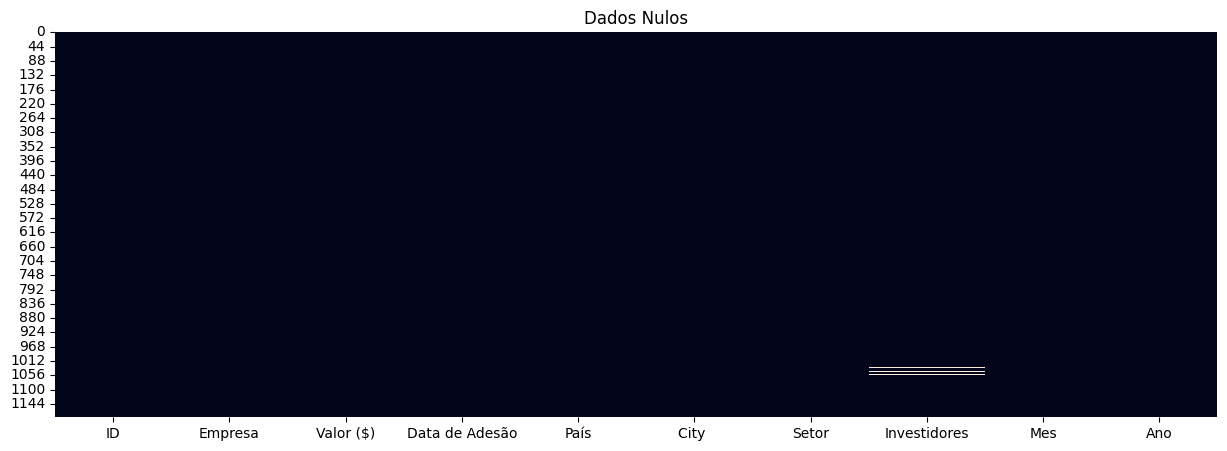

In [ ]:
#Gráfico
plt.figure(figsize=(15,5))
plt.title('Dados Nulos')    
sns.heatmap(base_dados.isnull(), cbar=False);
#Há dados nulos na coluna investidores

In [607]:
#Campos unicos 
base_dados.nunique()    

ID                1186
Empresa           1183
Valor ($)          222
Data de Adesão     695
País                48
City               286
Setor               34
Investidores      1152
Mes                 12
Ano                 13
dtype: int64

In [608]:
#valores unicos
base_dados['Setor'].unique()

array(['Artificial intelligence', 'Other',
       'E-commerce & direct-to-consumer', 'Fintech',
       'Internet software & services',
       'Supply chain, logistics, & delivery',
       'Data management & analytics',
       'Sequoia Capital, Thoma Bravo, Softbank', 'Edtech', 'Hardware',
       'Consumer & retail', 'Health', 'Auto & transportation',
       'Cybersecurity', 'Mobile & telecommunications', 'Travel',
       'Kuang-Chi',
       'Tiger Global Management, Tiger Brokers, DCM Ventures',
       'Jungle Ventures, Accel, Venture Highway',
       'Artificial Intelligence', 'GIC. Apis Partners, Insight Partners',
       'Vision Plus Capital, GSR Ventures, ZhenFund',
       'Hopu Investment Management, Boyu Capital, DC Thomson Ventures',
       'Internet', '500 Global, Rakuten Ventures, Golden Gate Ventures',
       'Sequoia Capital China, ING, Alibaba Entrepreneurs Fund',
       'Sequoia Capital China, Shunwei Capital Partners, Qualgro',
       'Dragonfly Captial, Qiming Venture Pa

In [ ]:
#valores unicos - Rank
base_dados['Setor'].value_counts()

Setor
Fintech                                                               239
Internet software & services                                          224
E-commerce & direct-to-consumer                                       103
Health                                                                 94
Artificial intelligence                                                74
Other                                                                  65
Supply chain, logistics, & delivery                                    65
Cybersecurity                                                          58
Data management & analytics                                            45
Auto & transportation                                                  40
Hardware                                                               38
Mobile & telecommunications                                            37
Edtech                                                                 32
Consumer & retail               

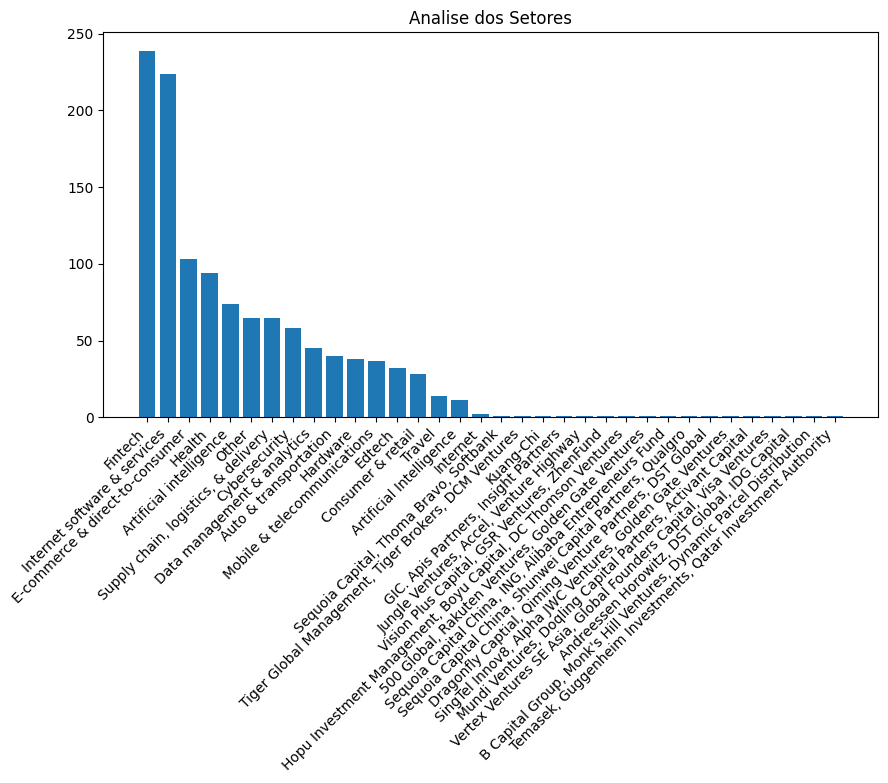

In [ ]:
plt.figure(figsize=(10,5))  
plt.title('Analise dos Setores')
plt.bar(base_dados['Setor'].value_counts().index, base_dados['Setor'].value_counts().values); #Gráfico de barras
plt.xticks(rotation=45, ha='right'); #Rotacionar os valores do eixo x   
#O setor Fintech lidera a participação de investimentos de unicórnios


In [611]:
Analise = round(base_dados['País'].value_counts(normalize=True) * 100, 1)

In [ ]:
Analise
#Os EUA lideram no panorama geram de participação em empresas unicórnios

País
United States           53.6
China                   14.7
India                    5.9
United Kingdom           3.9
Germany                  2.4
France                   2.0
Israel                   1.9
Canada                   1.6
Brazil                   1.4
South Korea              1.4
Singapore                1.1
Sweden                   0.7
Mexico                   0.7
Australia                0.7
Netherlands              0.6
Indonesia                0.6
Hong Kong                0.6
Switzerland              0.5
Ireland                  0.5
Japan                    0.5
Norway                   0.4
Spain                    0.3
Finland                  0.3
Turkey                   0.3
United Arab Emirates     0.3
Belgium                  0.3
Colombia                 0.3
Estonia                  0.2
Chile                    0.2
Vietnam                  0.2
Austria                  0.2
Denmark                  0.2
South Africa             0.2
Thailand                 0.2
Lithuania

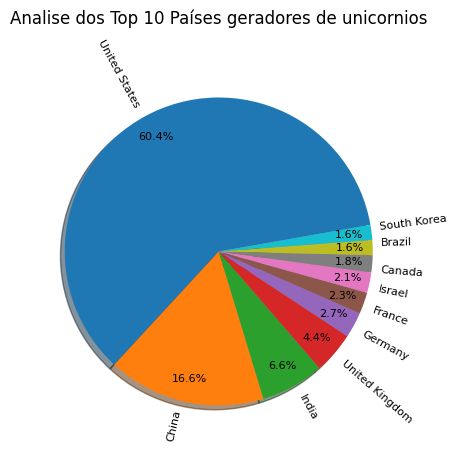

In [613]:
#Plot Geral dos top 10  Países
plt.figure(figsize=(10,5))  
plt.tight_layout()
plt.title('Analise dos Top 10 Países geradores de unicornios', pad=25) 
plt.pie(
    Analise.head(10),
    labels = Analise.index[0:10],
    shadow=True,
    startangle=10,
    autopct='%1.1f%%',
    textprops= {'fontsize': 8},  pctdistance=0.85, labeldistance=1.05,
    rotatelabels=True
);

plt.show()  

In [614]:
#Converter para data    
base_dados['Data de Adesão'] = pd.to_datetime(base_dados['Data de Adesão'])
base_dados['Data de Adesão'].head()



0   2017-04-07
1   2012-12-01
2   2018-07-03
3   2014-01-23
4   2018-01-08
Name: Data de Adesão, dtype: datetime64[ns]

In [615]:
#Extrair o Ano e Mês
base_dados['Mes'] = pd.DatetimeIndex(base_dados['Data de Adesão']).month
base_dados['Ano'] = pd.DatetimeIndex(base_dados['Data de Adesão']).year

base_dados.head()

,ID,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores,Mes,Ano
0,0,ByteDance,$140,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,$127,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,$100,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,$95,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,$40,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [616]:
#Tabela analítica
Analise_agrupada = base_dados.groupby( by=['País', 'Ano', 'Mes', 'Empresa']).count()['ID'].reset_index()

Analise_agrupada

,País,Ano,Mes,Empresa,ID
0,Argentina,2021,8,Uala,1
1,Australia,2018,1,Canva,1
2,Australia,2019,3,Airwallex,1
3,Australia,2021,5,SafetyCulture,1
4,Australia,2021,7,Culture Amp,1
...,...,...,...,...,...
1181,United States,2022,8,Flow,1
1182,United States,2022,8,Incredible Health,1
1183,United States,2022,8,Orna Therapeutics,1
1184,Vietnam,2021,10,Sky Mavis,1


In [ ]:
Analise_agrupada.loc[
    Analise_agrupada['País'] == 'Brazil'
]

#O brasil possui 17 empresas unicornios desenvolvidas de 2018 até 2022

,País,Ano,Mes,Empresa,ID
16,Brazil,2018,7,Movile,1
17,Brazil,2018,11,iFood,1
18,Brazil,2019,6,Loggi,1
19,Brazil,2019,9,QuintoAndar,1
20,Brazil,2019,10,EBANX,1
21,Brazil,2019,12,Wildlife Studios,1
22,Brazil,2020,1,Loft,1
23,Brazil,2020,12,C6 Bank,1
24,Brazil,2020,12,Creditas,1
25,Brazil,2021,1,MadeiraMadeira,1


In [618]:
#Remover o simbolo de dolar  e converter para numerico   
base_dados['Valor ($)'] = pd.to_numeric(base_dados['Valor ($)'].apply(lambda linha: linha.replace('$', '') ) ) 

base_dados.head()

,ID,Empresa,Valor ($),Data de Adesão,País,City,Setor,Investidores,Mes,Ano
0,0,ByteDance,140.0,2017-04-07,China,Beijing,Artificial intelligence,"Sequoia Capital China, SIG Asia Investments, S...",4,2017
1,1,SpaceX,127.0,2012-12-01,United States,Hawthorne,Other,"Founders Fund, Draper Fisher Jurvetson, Rothen...",12,2012
2,2,SHEIN,100.0,2018-07-03,China,Shenzhen,E-commerce & direct-to-consumer,"Tiger Global Management, Sequoia Capital China...",7,2018
3,3,Stripe,95.0,2014-01-23,United States,San Francisco,Fintech,"Khosla Ventures, LowercaseCapital, capitalG",1,2014
4,4,Canva,40.0,2018-01-08,Australia,Surry Hills,Internet software & services,"Sequoia Capital China, Blackbird Ventures, Mat...",1,2018


In [621]:
base_dados.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1186 entries, 0 to 1185
Data columns (total 10 columns):
 #   Column          Non-Null Count  Dtype         
---  ------          --------------  -----         
 0   ID              1186 non-null   int64         
 1   Empresa         1186 non-null   object        
 2   Valor ($)       1186 non-null   float64       
 3   Data de Adesão  1186 non-null   datetime64[ns]
 4   País            1186 non-null   object        
 5   City            1186 non-null   object        
 6   Setor           1186 non-null   object        
 7   Investidores    1168 non-null   object        
 8   Mes             1186 non-null   int32         
 9   Ano             1186 non-null   int32         
dtypes: datetime64[ns](1), float64(1), int32(2), int64(1), object(5)
memory usage: 83.5+ KB


In [628]:
numeric_columns = base_dados.select_dtypes(include=['number']).columns
Analise_pais = base_dados.groupby(by=['País', 'Setor'])[numeric_columns].sum()['Valor ($)'].reset_index()  #Agrupar por País e Setor e somar os valores    
Analise_pais.head()

,País,Setor,Valor ($)
0,Argentina,Fintech,2.45
1,Australia,E-commerce & direct-to-consumer,1.00
2,Australia,Fintech,8.00
3,Australia,Internet software & services,45.40
4,Austria,Edtech,3.50


In [ ]:
analise_valor = Analise_pais.sort_values(by='Valor ($)', ascending=False)   
analise_valor.head()    

,País,Setor,Valor ($)
211,United States,Fintech,485.85
214,United States,Internet software & services,474.41
216,United States,Other,228.26
34,China,E-commerce & direct-to-consumer,190.08
213,United States,Health,178.61


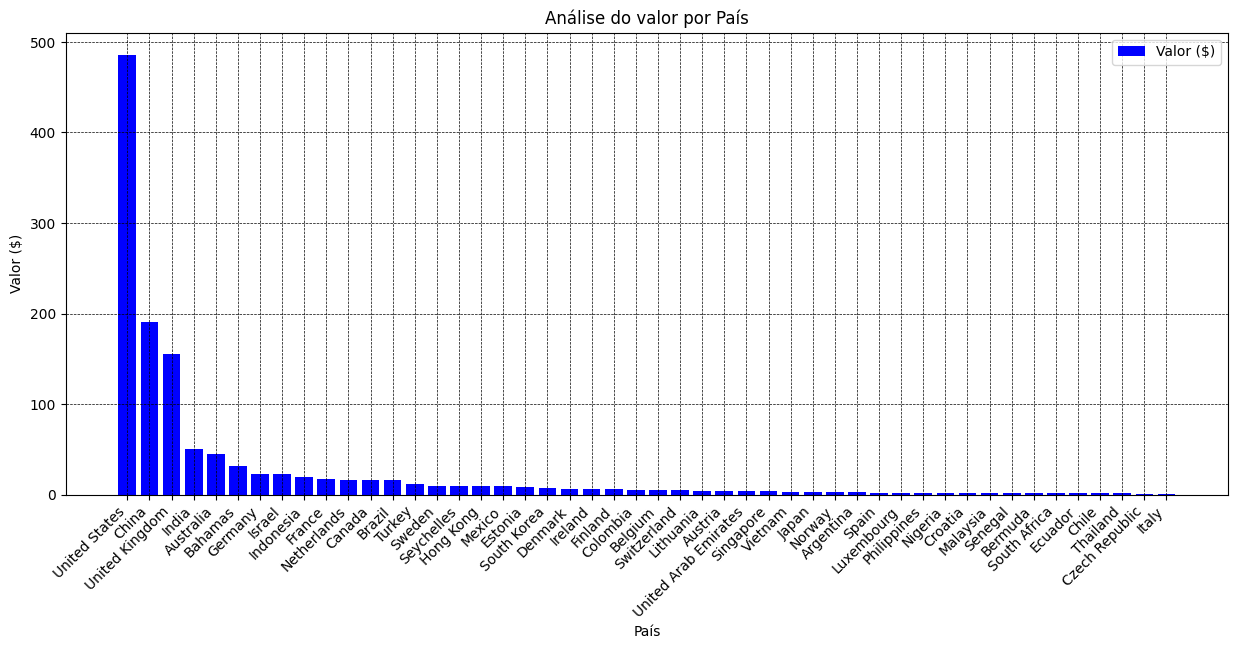

In [ ]:
#Gráfico    
import matplotlib.pyplot as plt

plt.figure(figsize=(15, 6))

plt.bar(analise_valor['País'], analise_valor['Valor ($)'], color='blue', label='Valor ($)')
plt.xlabel('País')
plt.ylabel('Valor ($)')
plt.title('Análise do valor por País')
plt.legend()
plt.xticks(rotation=45, ha='right') 
plt.grid(True, linestyle='--', linewidth=0.5, color='black')
plt.show()

#Os EUA, china e UK lideram os investimentos em empresas unicórnios